<center><h1>Model Comparison on Xtohh</h1>
John Ignacio R.M. October 2020 </center>

In [1]:
# Libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Constants
masses = [1000, 1200, 1400, 1600, 1800, 2000, 2500, 3000]
source_path = "./scores"
dest_path = "./figures/comparison"
palette = ["#f94144", "#f3722c", "#F8961E", "#F9C74F", "#90BE6D", "#43AA8B", "#577590"]
palette2 = ["#364f6b", "#3fc1c9", "#fc5185", "#457B9D", "#1D3557", "#2A9D8F", "#d12c85","#006d77", "#ef476f"]

In [22]:
def plot_evaluation(df, title, colors, ymin, save = False, dest_path = './', name = 'cm'):
    f, a = plt.subplots(1, 2, sharey=True)
    f.set_size_inches(9, 3)
    # Plot
    df.xs('signal').plot(kind='bar',ax = a[0], color=colors, width=0.7)
    df.xs('bg').plot(kind='bar',ax = a[1], color=colors, width=0.7)
    # Legend
    a[0].get_legend().remove()
    box = a[1].get_position()
    a[1].legend(loc='upper center', bbox_to_anchor=(-0.1, -0.1), ncol=8)
    # Titles
    a[0].title.set_text('Signal')
    a[1].title.set_text('Background')
    #f.suptitle(title, fontsize = 16)
    f.autofmt_xdate(rotation=0, ha='center')
    # Grid
    a[0].grid()
    a[0].set_axisbelow(True)
    a[1].grid()
    a[1].set_axisbelow(True)
    # Y limit
    a[0].set_ylim(ymin=ymin)
    # Values on top of each bar
    #for p in a[0].patches:
    #    a[0].annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
    plt.subplots_adjust(wspace = 0.05)
    if save:
        plt.savefig(f'{dest_path}/{name}.png', bbox_inches="tight", dpi=200)
    plt.show()

def get_scores_from_json(source_path, filename):
    with open(f"{source_path}/{filename}", 'r') as json_file:
        score = json.loads(json_file.read())
        json_file.close()
        return score

In [7]:
# Deep neural networks
bc4 = get_scores_from_json(source_path, f"eval_BC4_SR2_Oct2020.json")
bc1 = get_scores_from_json(source_path, f"eval_BC4_SR2_Oct2020.json")

# Autoencoders
a1 = get_scores_from_json(source_path, f"eval_A1_SR2_Oct2020.json")
a2 = get_scores_from_json(source_path, f"eval_A2_SR2_Oct2020.json")

# Mass Parameterized
bc4_mass_param = {mass: get_scores_from_json(source_path, f"eval_BC4_{mass}_SR2_Oct2020.json") for mass in masses}
bc1_mass_param = {mass: get_scores_from_json(source_path, f"eval_BC1_{mass}_SR2_Oct2020.json") for mass in masses}

# Class weights
bc4_cw = get_scores_from_json(source_path, f"eval_BC4_bg11signal10_SR2_Oct2020.json")

# Oversampling
bc4_os = get_scores_from_json(source_path, f"eval_BC4_adasyn_20_SR2_Oct2020.json")

# Mass Parameterized with Class weights
bc4_cw_mp = {mass: get_scores_from_json(source_path, f"eval_BC4_{mass}_bg13signal10_SR2_MassParam_Oct2020.json") for mass in masses}

# Xtohh2000 SR2

In [12]:
xtohh2000 = pd.concat({
    "signal": pd.DataFrame({
        #'BC1': bc1['weighted_class_report']['1'],
        'A1': a1['weighted_class_report']['1'],
        'BC4': bc4['weighted_class_report']['1'],
        'BC4-CW': bc4_cw['weighted_class_report']['1'],
        'BC4-ADASYN': bc4_os['weighted_class_report']['1'],
        'BC1-MP': bc1_mass_param[2000]['weighted_class_report']['1'],
        'BC4-MP': bc4_mass_param[2000]['weighted_class_report']['1'],
        'BC4-CW-MP': bc4_cw_mp[2000]['weighted_class_report']['1'],
    }),
    "bg": pd.DataFrame({
        #'BC1': bc1['weighted_class_report']['0'],
        'A1': a1['weighted_class_report']['0'],
        'BC4': bc4['weighted_class_report']['0'],
        'BC4-CW': bc4_cw['weighted_class_report']['0'],
        'BC4-ADASYN': bc4_os['weighted_class_report']['0'],
        'BC1-MP': bc1_mass_param[2000]['weighted_class_report']['0'],
        'BC4-MP': bc4_mass_param[2000]['weighted_class_report']['0'],
        'BC4-CW-MP': bc4_cw_mp[2000]['weighted_class_report']['0'],
    })
}).drop(index = "support", level = 1)
xtohh2000

A1       BC4    BC4-CW  BC4-ADASYN    BC1-MP  \
signal precision  0.902142  0.954579  0.982993    0.997836  0.952419   
       recall     0.876621  0.983888  0.984849    0.961270  0.990499   
       f1-score   0.889198  0.969012  0.983920    0.979212  0.971086   
bg     precision  0.470955  0.907519  0.925377    0.839672  0.942397   
       recall     0.535970  0.771545  0.916848    0.989828  0.758523   
       f1-score   0.501363  0.834026  0.921093    0.908588  0.840521   

                    BC4-MP  BC4-CW-MP  
signal precision  0.992918   0.998127  
       recall     0.984791   0.986248  
       f1-score   0.988838   0.992152  
bg     precision  0.928634   0.936577  
       recall     0.965725   0.990967  
       f1-score   0.946816   0.963004

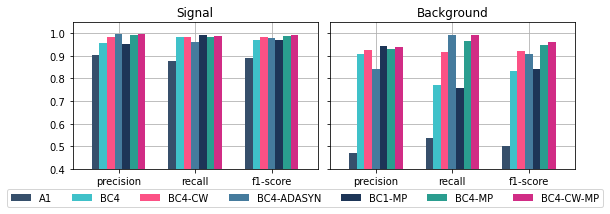

In [23]:
plot_evaluation(xtohh2000, "Xtohh2000 Signal Region 2 scores", palette2, 0.4, save=True, dest_path=dest_path, name = f"xtohh2000")

# All xtohh's SR2

In [16]:
xtohh = {mass: pd.concat({
    "signal": pd.DataFrame({
        'BC1-MP': bc1_mass_param[mass]['weighted_class_report']['1'],
        'BC4-MP': bc4_mass_param[mass]['weighted_class_report']['1'],
        'BC4-CW-MP': bc4_cw_mp[mass]['weighted_class_report']['1'],
    }),
    "bg": pd.DataFrame({
        'BC1-MP': bc1_mass_param[mass]['weighted_class_report']['0'],
        'BC4-MP': bc4_mass_param[mass]['weighted_class_report']['0'],
        'BC4-CW-MP': bc4_cw_mp[mass]['weighted_class_report']['0'],
    })
}).drop(index = "support", level = 1) for mass in masses}

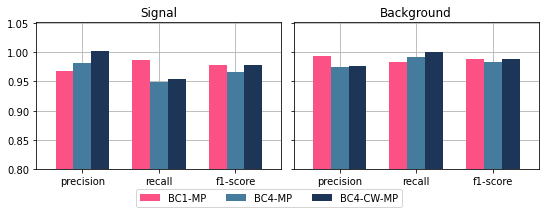

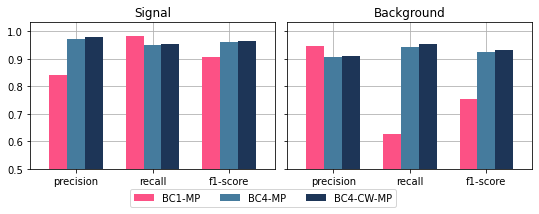

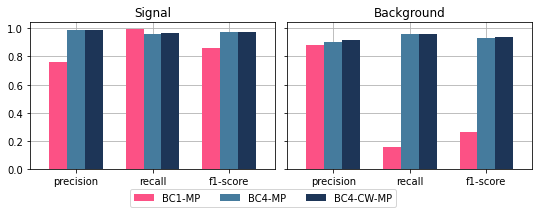

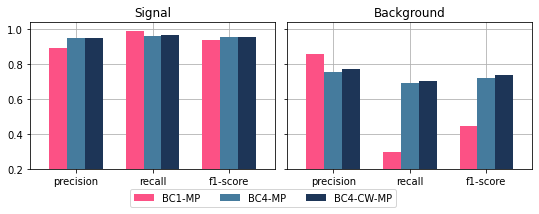

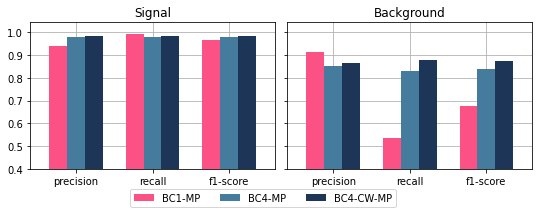

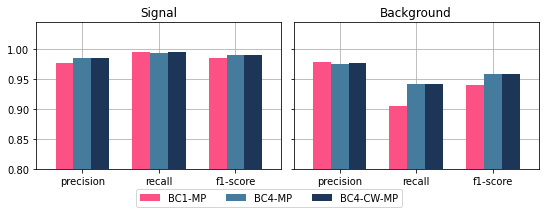

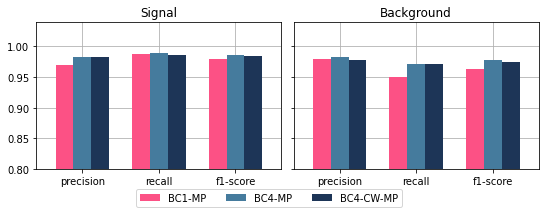

In [24]:
ymins = {1000: 0.8, 1200: 0.5, 1400: 0.0, 1600: 0.2, 1800: 0.4, 2500: 0.8, 3000: 0.8}
for mass in masses:
    if mass != 2000:
        plot_evaluation(xtohh[mass], f"Xtohh{mass} Signal Region 2 scores", palette2[2:], ymins[mass], save=True, dest_path=dest_path, name = f"xtohh{mass}")